In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
test_data_dir = '../examples/PyMPDATA_examples/Arabas_and_Farhat_2020/data/'
# train_data_dir = './data/'

In [3]:
def load_data(filepath, idx):
    data = []
    for i in range(idx):
        advector = np.load(filepath + 'advector_' + str(i) + '.npy')
        advectee = np.load(filepath + 'advectee_' + str(i) + '.npy')
        flux = np.load(filepath + 'corrective_flux_' + str(i) + '.npy')
        data.append([advector, advectee, -flux])
        
    for i in range(idx):
        data[i][1] = pd.DataFrame(data[i][1]).fillna(method='ffill').values
        data[i][0] = pd.DataFrame(data[i][0]).fillna(method='ffill').values
        data[i][2] = pd.DataFrame(data[i][2]).fillna(method='ffill').values
        data[i][1] = pd.DataFrame(data[i][1]).fillna(method='bfill').values
        data[i][0] = pd.DataFrame(data[i][0]).fillna(method='bfill').values
        data[i][2] = pd.DataFrame(data[i][2]).fillna(method='bfill').values
    return data

In [4]:
# data_train = loda_data(train_data_dir, 200)
data_test = load_data(test_data_dir, 17)

In [5]:
def get_stencils(data, stencil_length):
    stencils= []
    max_advector = max(data[:][0].max() for data in data)
    max_advectee = max(data[:][1].max() for data in data)
    max_flux = max(data[:][2].max() for data in data)
    # print(f"max_advector: {max_advector}, max_advectee: {max_advectee}, max_flux: {max_flux}")
    for i in range(len(data)):
        advector, advectee, flux = data[i]
        for j in range(0, len(data[i][1])-1):
            advectee_stencil = advectee[j-1:j+1]
            advector_stencil = advector[j-1:j+2]
            flux_stencil = flux[j]
            if np.isnan(advectee_stencil).any() or np.isnan(advector_stencil).any() or np.isnan(flux_stencil).any():
                continue
            try:
                assert advectee_stencil.shape[0] == stencil_length -1
                assert advector_stencil.shape[0] == stencil_length
            except:
                print(advectee_stencil.shape[0], advector_stencil.shape[0])
                print(advectee_stencil)
                print(advector_stencil)
                print(flux_stencil)
                print()
                continue
            # if any of the values are nan, skip this stencil
            advector_stencil = advector_stencil / max_advector
            # flatten the stencil
            advector_stencil = advector_stencil.flatten()
            advectee_stencil = advectee_stencil / max_advectee
            advectee_stencil = advectee_stencil.flatten()
            flux_stencil = flux_stencil / max_flux
            # flatten the stencil
            flux_stencil = flux_stencil.flatten()
            input_stencil = np.concatenate((advector_stencil, advectee_stencil), axis=0)

            stencils.append((input_stencil, flux_stencil[0]))
    return stencils

In [6]:
stencils = get_stencils(data_test, 3)

0 0
[]
[]
[-0.]

2 2
[[0.]
 [0.]]
[[0.03378399]
 [0.03378399]]
[-0.]

0 0
[]
[]
[-0.]

2 2
[[0.]
 [0.]]
[[0.03378399]
 [0.03378399]]
[-0.]

0 0
[]
[]
[-0.]

2 2
[[0.]
 [0.]]
[[0.03378399]
 [0.03378399]]
[-0.]

0 0
[]
[]
[-0.]

2 2
[[0.]
 [0.]]
[[0.03378399]
 [0.03378399]]
[-0.]

0 0
[]
[]
[-0.]

2 2
[[0.]
 [0.]]
[[0.03378399]
 [0.03378399]]
[-0.]

0 0
[]
[]
[-0.]

2 2
[[0.]
 [0.]]
[[0.03378399]
 [0.03378399]]
[-0.]

0 0
[]
[]
[-0.]

2 2
[[0.]
 [0.]]
[[0.03378399]
 [0.03378399]]
[-0.]

0 0
[]
[]
[-0.]

2 2
[[0.]
 [0.]]
[[0.03378399]
 [0.03378399]]
[-0.]

0 0
[]
[]
[-0.]

2 2
[[0.]
 [0.]]
[[0.03378399]
 [0.03378399]]
[-0.]

0 0
[]
[]
[-0.]

2 2
[[0.]
 [0.]]
[[0.03378399]
 [0.03378399]]
[-0.]

0 0
[]
[]
[-2.17450693e-14]

2 2
[[0.]
 [0.]]
[[0.03378399]
 [0.03378399]]
[-0.]

0 0
[]
[]
[-5.18210836e-14]

2 2
[[0.]
 [0.]]
[[0.03378399]
 [0.03378399]]
[-0.]

0 0
[]
[]
[-2.47264092e-13]

2 2
[[0.]
 [0.]]
[[0.03378399]
 [0.03378399]]
[-0.]

0 0
[]
[]
[-3.34939351e-12]

2 2
[[0.]
 [0.]]
[[0.0337

In [7]:
df = pd.DataFrame(stencils, columns=['input', 'flux'])

In [8]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [9]:
model = keras.Sequential()
model.add(layers.Dense(5, activation='relu'))
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1))
model.compile(optimizer='adam', loss='mse')

In [10]:
# split the data, last 1/17 of the data is the test data
# shuffle the data after splitting
split = int(len(df) * 16/17)
X_train = df['input'].values[:split]
y_train = df['flux'].values[:split]
X_test = df['input'].values[split:]
y_test = df['flux'].values[split:]
X_train, y_train = np.stack(X_train), np.stack(y_train)
X_test, y_test = np.stack(X_test), np.stack(y_test)

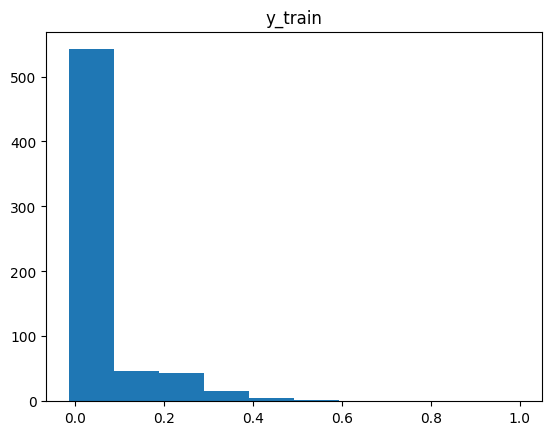

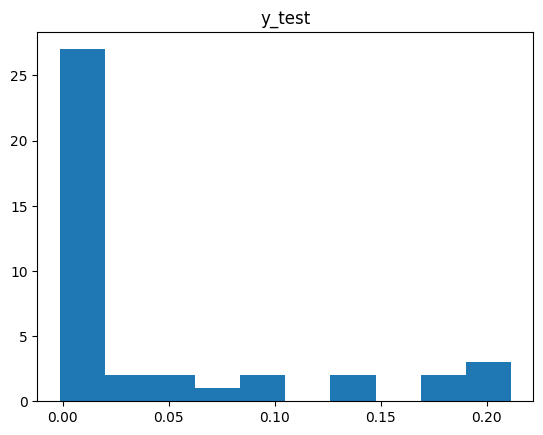

In [11]:
plt.hist(y_train)
plt.title('y_train')
plt.show()
plt.hist(y_test)
plt.title('y_test')
plt.show()

In [12]:
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))

Epoch 1/100
21/21 [==============================] - 1s 8ms/step - loss: 0.0535 - val_loss: 0.0129
Epoch 2/100
21/21 [==============================] - 0s 3ms/step - loss: 0.0112 - val_loss: 0.0039
Epoch 3/100
21/21 [==============================] - 0s 2ms/step - loss: 0.0079 - val_loss: 0.0037
Epoch 4/100
21/21 [==============================] - 0s 3ms/step - loss: 0.0069 - val_loss: 0.0031
Epoch 5/100
21/21 [==============================] - 0s 2ms/step - loss: 0.0063 - val_loss: 0.0030
Epoch 6/100
21/21 [==============================] - 0s 3ms/step - loss: 0.0059 - val_loss: 0.0029
Epoch 7/100
21/21 [==============================] - 0s 2ms/step - loss: 0.0055 - val_loss: 0.0028
Epoch 8/100
21/21 [==============================] - 0s 2ms/step - loss: 0.0052 - val_loss: 0.0028
Epoch 9/100
21/21 [==============================] - 0s 2ms/step - loss: 0.0049 - val_loss: 0.0027
Epoch 10/100
21/21 [==============================] - 0s 2ms/step - loss: 0.0046 - val_loss: 0.0028
Epoch 11/

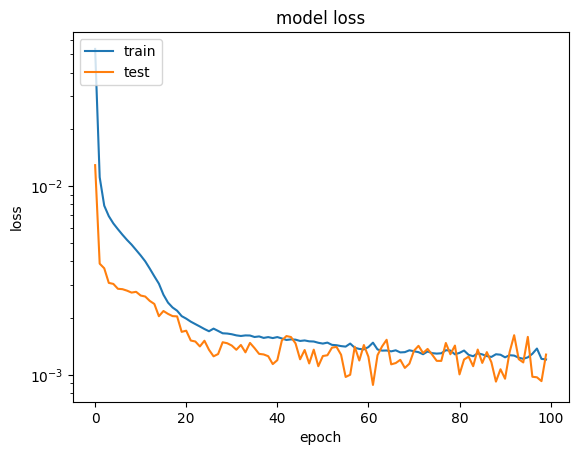

In [13]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.yscale('log')
plt.show()

2/2 [==============================] - 0s 0s/step


(array([23.,  6.,  2.,  2.,  1.,  1.,  2.,  0.,  2.,  2.]),
 array([-0.02476921,  0.01100052,  0.04677026,  0.08254   ,  0.11830974,
         0.15407947,  0.1898492 ,  0.22561894,  0.26138869,  0.29715842,
         0.33292815]),
 <BarContainer object of 10 artists>)

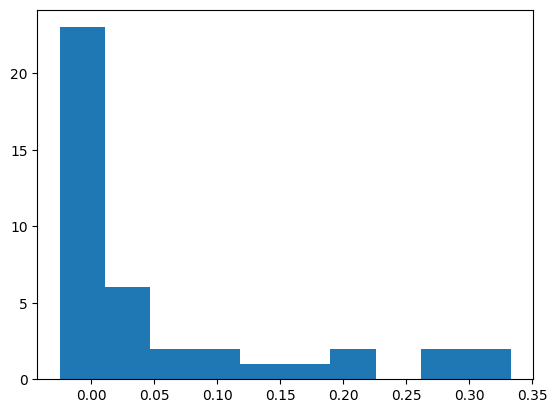

In [14]:
outputs = model.predict(X_test)
plt.hist(outputs)

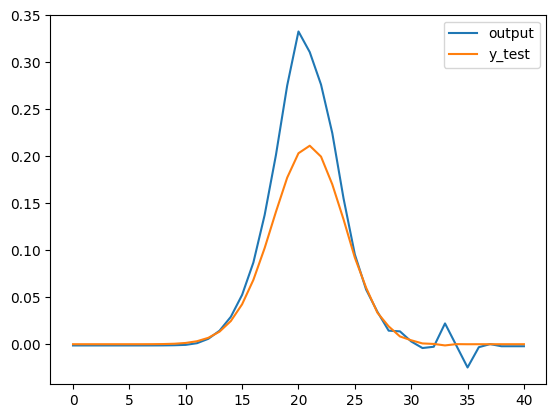

In [15]:
# merge the outputs into one vector
output = np.concatenate(outputs)
plt.plot(output)
plt.plot(y_test)
plt.legend(['output', 'y_test'])
plt.show()

In [16]:
def train_model(model, df, split_idx, epochs=100):
    X_train = df['input'].values[:split_idx]
    y_train = df['flux'].values[:split_idx]
    X_test = df['input'].values[split_idx:]
    y_test = df['flux'].values[split_idx:]
    X_train, y_train = np.stack(X_train), np.stack(y_train)
    X_test, y_test = np.stack(X_test), np.stack(y_test)
    history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test))
    return model, history

In [17]:
def visualize_training(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.yscale('log')
    plt.show()

In [18]:
def visualize_output(model, df, split_idx):
    X_test = df['input'].values[split_idx:]
    y_test = df['flux'].values[split_idx:]
    X_test, y_test = np.stack(X_test), np.stack(y_test)
    outputs = model.predict(X_test)
    output = np.concatenate(outputs)
    plt.plot(output)
    plt.plot(y_test)
    plt.legend(['output', 'y_test'])
    plt.show()

In [19]:
def get_model(n_hidden_layers, n_neurons, n_inputs=5):
    model = keras.Sequential()
    # add the input layer
    model.add(layers.Dense(n_neurons, activation='relu', input_shape=(n_inputs,)))
    for i in range(n_hidden_layers):
        model.add(layers.Dense(n_neurons, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

Epoch 1/100
21/21 [==============================] - 1s 11ms/step - loss: 0.0392 - val_loss: 0.0110
Epoch 2/100
21/21 [==============================] - 0s 5ms/step - loss: 0.0123 - val_loss: 0.0038
Epoch 3/100
21/21 [==============================] - 0s 5ms/step - loss: 0.0089 - val_loss: 0.0034
Epoch 4/100
21/21 [==============================] - 0s 5ms/step - loss: 0.0081 - val_loss: 0.0029
Epoch 5/100
21/21 [==============================] - 0s 5ms/step - loss: 0.0074 - val_loss: 0.0026
Epoch 6/100
21/21 [==============================] - 0s 5ms/step - loss: 0.0068 - val_loss: 0.0025
Epoch 7/100
21/21 [==============================] - 0s 4ms/step - loss: 0.0063 - val_loss: 0.0024
Epoch 8/100
21/21 [==============================] - 0s 4ms/step - loss: 0.0058 - val_loss: 0.0023
Epoch 9/100
21/21 [==============================] - 0s 3ms/step - loss: 0.0054 - val_loss: 0.0024
Epoch 10/100
21/21 [==============================] - 0s 5ms/step - loss: 0.0050 - val_loss: 0.0023
Epoch 11

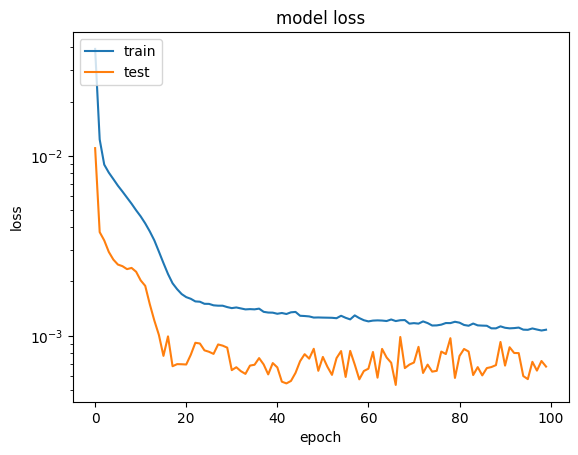

2/2 [==============================] - 0s 0s/step


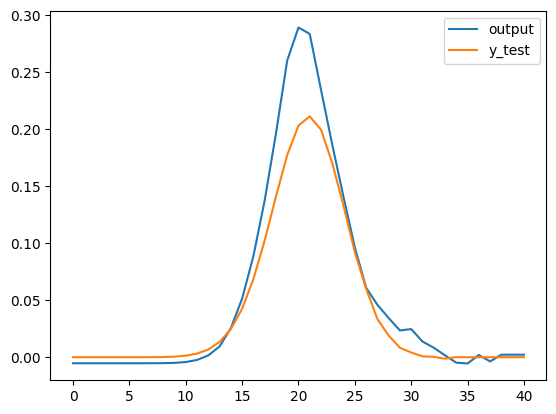

In [125]:
model2 = get_model(n_hidden_layers=2, n_neurons=10)
model2, history2 = train_model(model2, df, split_idx=split, epochs=100)
visualize_training(history2)
visualize_output(model2, df, split)

Epoch 1/100
21/21 [==============================] - 1s 11ms/step - loss: 0.0094 - val_loss: 0.0036
Epoch 2/100
21/21 [==============================] - 0s 4ms/step - loss: 0.0060 - val_loss: 0.0021
Epoch 3/100
21/21 [==============================] - 0s 4ms/step - loss: 0.0046 - val_loss: 0.0015
Epoch 4/100
21/21 [==============================] - 0s 4ms/step - loss: 0.0035 - val_loss: 0.0011
Epoch 5/100
21/21 [==============================] - 0s 3ms/step - loss: 0.0028 - val_loss: 0.0012
Epoch 6/100
21/21 [==============================] - 0s 3ms/step - loss: 0.0024 - val_loss: 0.0012
Epoch 7/100
21/21 [==============================] - 0s 3ms/step - loss: 0.0023 - val_loss: 8.7730e-04
Epoch 8/100
21/21 [==============================] - 0s 4ms/step - loss: 0.0022 - val_loss: 9.8445e-04
Epoch 9/100
21/21 [==============================] - 0s 3ms/step - loss: 0.0020 - val_loss: 7.1634e-04
Epoch 10/100
21/21 [==============================] - 0s 4ms/step - loss: 0.0019 - val_loss: 7.8

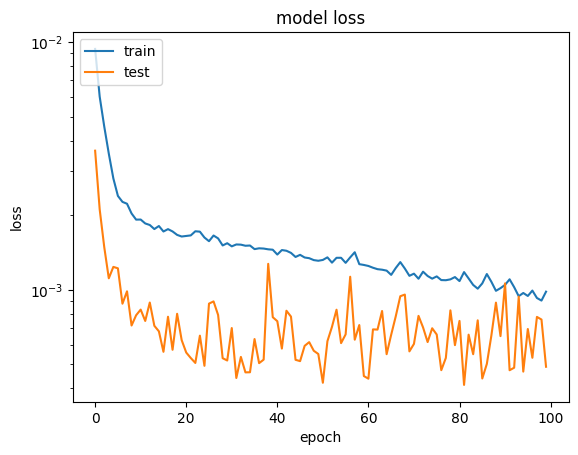

2/2 [==============================] - 0s 8ms/step


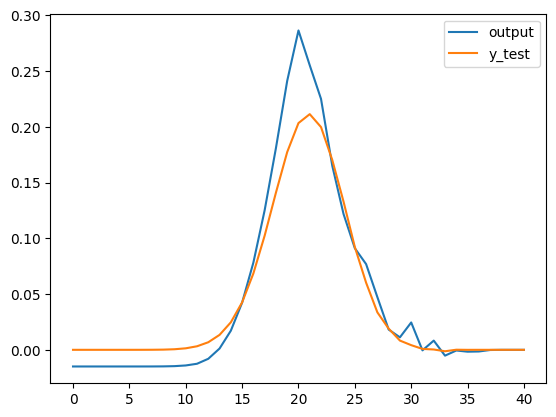

In [126]:
model3 = get_model(n_hidden_layers=3, n_neurons=10)
model3, history3 = train_model(model3, df, split_idx=split, epochs=100)
visualize_training(history3)
visualize_output(model3, df, split)

Epoch 1/100
21/21 [==============================] - 1s 12ms/step - loss: 0.0181 - val_loss: 0.0074
Epoch 2/100
21/21 [==============================] - 0s 5ms/step - loss: 0.0109 - val_loss: 0.0055
Epoch 3/100
21/21 [==============================] - 0s 4ms/step - loss: 0.0084 - val_loss: 0.0033
Epoch 4/100
21/21 [==============================] - 0s 4ms/step - loss: 0.0068 - val_loss: 0.0018
Epoch 5/100
21/21 [==============================] - 0s 3ms/step - loss: 0.0050 - val_loss: 9.3584e-04
Epoch 6/100
21/21 [==============================] - 0s 3ms/step - loss: 0.0037 - val_loss: 6.2612e-04
Epoch 7/100
21/21 [==============================] - 0s 4ms/step - loss: 0.0028 - val_loss: 5.0043e-04
Epoch 8/100
21/21 [==============================] - 0s 3ms/step - loss: 0.0024 - val_loss: 8.2973e-04
Epoch 9/100
21/21 [==============================] - 0s 3ms/step - loss: 0.0021 - val_loss: 8.7361e-04
Epoch 10/100
21/21 [==============================] - 0s 4ms/step - loss: 0.0021 - val_l

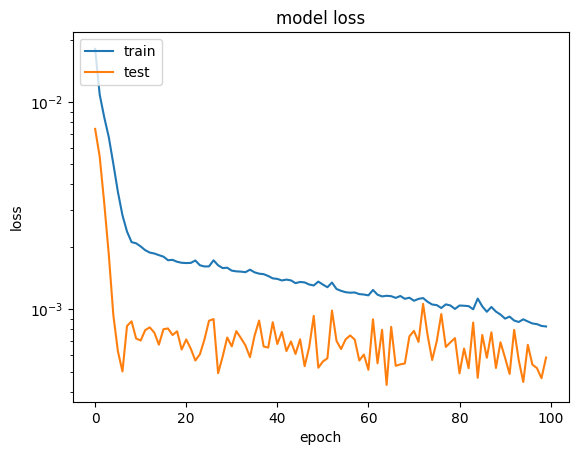

2/2 [==============================] - 0s 4ms/step


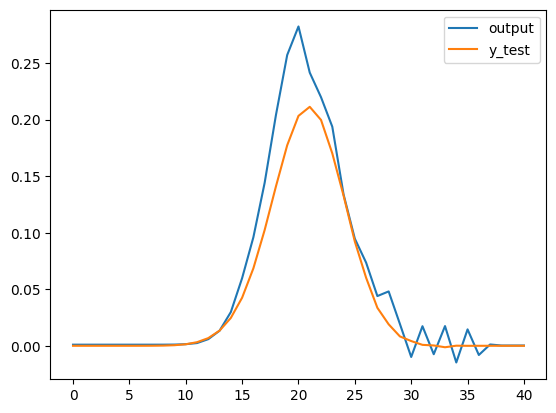

In [127]:
model4 = get_model(n_hidden_layers=2, n_neurons=15)
model4, history4 = train_model(model4, df, split_idx=split, epochs=100)
visualize_training(history4)
visualize_output(model4, df, split)

2/2 [==============================] - 0s 4ms/step


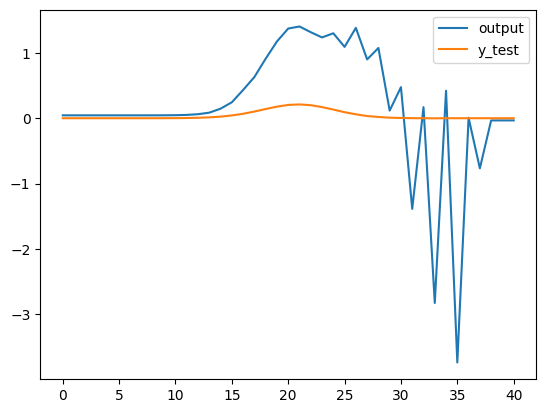

In [22]:
# load model from file
model5 = keras.models.load_model('model.h5')
visualize_output(model5, df, split)